In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')


In [3]:
df = pd.read_csv('kidney_disease.csv')

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.drop("id", axis=1, inplace=True)
for i in df.columns:
    print(f"unique values of {i}: {df[i].unique()}")

unique values of age: [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values of bp: [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values of sg: [1.02  1.01  1.005 1.015   nan 1.025]
unique values of al: [ 1.  4.  2.  3.  0. nan  5.]
unique values of su: [ 0.  3.  4.  1. nan  2.  5.]
unique values of rbc: [nan 'normal' 'abnormal']
unique values of pc: ['normal' 'abnormal' nan]
unique values of pcc: ['notpresent' 'present' nan]
unique values of ba: ['notpresent' 'present' nan]
unique values of bgr: [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246.

In [8]:
for i in range(df.shape[0]):
    if df.iloc[i,24]=='ckd\t':
        df.iloc[i,24]='ckd'
    if df.iloc[i,19] in [' yes','\tyes']:
        df.iloc[i,19]='yes'
    if df.iloc[i,19]=='\tno':
        df.iloc[i,19]='no'
    if df.iloc[i,20]=='\tno':
        df.iloc[i,20]='no'
    if df.iloc[i,15]=='\t?':
        df.iloc[i,15]=np.nan
    if df.iloc[i,15]=='\t43':
        df.iloc[i,15]='43'
    if df.iloc[i,16]=='\t?':
        df.iloc[i,16]=np.nan
    if df.iloc[i,16]=='\t6200':
        df.iloc[i,16]= '6200'
    if df.iloc[i,16]=='\t8400':
        df.iloc[i,16]= '8400'
    if df.iloc[i,17]=='\t?':
        df.iloc[i,17]=np.nan
    if df.iloc[i,24]=='ckd':
        df.iloc[i,24]='yes'
    if df.iloc[i,24]=='notckd':
        df.iloc[i,24]='no'

In [9]:
#df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

In [10]:
cat_cols = [i for i in df.columns if df[i].dtype == 'object']
num_cols = [i for i in df.columns if df[i].dtype != 'object']
print(f"categorical values: {cat_cols}")
print(f"numerical values: {num_cols}")

categorical values: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
numerical values: ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


In [11]:
df.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [12]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [13]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)


In [14]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

#random_value_imputation('rbc')
#random_value_imputation('pc')

for col in cat_cols:
    impute_mode(col)



In [15]:
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

rbc: ['normal' 'abnormal']
pc: ['normal' 'abnormal']
pcc: ['notpresent' 'present']
ba: ['notpresent' 'present']
htn: ['yes' 'no']
dm: ['yes' 'no']
cad: ['no' 'yes']
appet: ['good' 'poor']
pe: ['no' 'yes']
ane: ['no' 'yes']
classification: ['yes' 'no']


In [16]:
df[num_cols].isnull().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

Feature selection for categorical values

                                        ***Chi-Square Test of Independence***

The Chi-Square test is used to determine if there is a significant association between the categorical predictor and the categorical target.

In [17]:
from scipy.stats import chi2_contingency

# Create a contingency table
# contingency_table = pd.crosstab(df['rbc'], df['classification'])
# cat_cols.pop()
categoricalsValues = ["rbc", "pc", "pcc", "ba", "cad", "appet", "htn", "dm", "pe", "ane"]
for col in categoricalsValues:
    contingency_table = pd.crosstab(df[col], df['classification'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Statistic for {col}: {chi2}, p-value: {p}")

# Perform the Chi-Square test
# chi2, p, dof, expected = chi2_contingency(contingency_table)

# print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic for rbc: 30.16735981355353, p-value: 3.9632369208759623e-08
Chi-Square Statistic for pc: 54.33831492311025, p-value: 1.6877864730866308e-13
Chi-Square Statistic for pcc: 26.397091425024385, p-value: 2.779587257224494e-07
Chi-Square Statistic for ba: 12.32643899310566, p-value: 0.0004465875336337068
Chi-Square Statistic for cad: 20.580735026250938, p-value: 5.716852372774115e-06
Chi-Square Statistic for appet: 59.89057626425321, p-value: 1.0028045769048357e-14
Chi-Square Statistic for htn: 136.92846835703978, p-value: 1.2500814473128787e-31
Chi-Square Statistic for dm: 122.59739298566973, p-value: 1.7082083994569608e-28
Chi-Square Statistic for pe: 54.33831492311025, p-value: 1.6877864730866308e-13
Chi-Square Statistic for ane: 40.491503267973854, p-value: 1.9747291794838495e-10


                                    ***Cramér's V***

Cramér's V is used to measure the strength of association between two categorical variables.

In [18]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Create a contingency table

for col in categoricalsValues:
    contingency_table = pd.crosstab(df[col], df['classification'])
    # Calculate Cramér's V
    cramer_v = cramers_v(contingency_table.values)
    print(f"Cramér's V for {col}: {cramer_v}")


Cramér's V for rbc: 0.2746241058863621
Cramér's V for pc: 0.3685726350501019
Cramér's V for pcc: 0.25689049916756546
Cramér's V for ba: 0.17554514371740434
Cramér's V for cad: 0.2268299750157094
Cramér's V for appet: 0.38694500986656105
Cramér's V for htn: 0.5850821915702096
Cramér's V for dm: 0.5536185351522963
Cramér's V for pe: 0.3685726350501019
Cramér's V for ane: 0.3181646714673624


In [19]:
#Future encoding

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pickle

lbl_data = df.copy()
df_input = df[cat_cols].copy()
# enc = LabelEncoder()
# encoder_dict = dict()
# for cat in cat_cols:
#     df_input[cat] = df_input[cat].str.lstrip()
#     enc = enc.fit(list(df_input[cat]))
#     encoder_dict[cat] = [cat for cat in enc.classes_]
#     lbl_data[cat] = enc.transform(df_input[cat])


encoder_dict = {}

for cat in cat_cols:
    # Strip leading whitespace
    df_input[cat] = df_input[cat].str.lstrip()

    # Initialize and fit the LabelEncoder
    enc = LabelEncoder()
    enc.fit(df_input[cat])

    # Save the encoder classes for deployment
    encoder_dict[cat] = list(enc.classes_)

    # Transform the data
    lbl_data[cat] = enc.transform(df_input[cat])

                *Mutual Information*

Mutual information measures the dependency between the predictor and target variables.

In [20]:
from sklearn.feature_selection import mutual_info_classif



# Assuming 'categorical_target' is the target variable and 'categorical_predictor' is the predictor
for col in categoricalsValues:
    mi = mutual_info_classif(lbl_data[[col]], df['classification'], discrete_features=True)
    print(f"Mutual Information for {col}: {mi[0]}")

# # Output the results
# for feature, mi in mi_dict.items():
#     print(f"Mutual Information for {feature}: {mi}")

Mutual Information for rbc: 0.05984544756415067
Mutual Information for pc: 0.10233828081061158
Mutual Information for pcc: 0.05299425206013644
Mutual Information for ba: 0.02680346708759873
Mutual Information for cad: 0.04229231353127652
Mutual Information for appet: 0.11178549548320577
Mutual Information for htn: 0.23412533629305263
Mutual Information for dm: 0.21234725607343302
Mutual Information for pe: 0.10233828081061158
Mutual Information for ane: 0.07828413275163243


Feature selection for numerical values

ANOVA: Used for continuous numerical features to check if their means differ across the target categories.

In [21]:
from scipy.stats import f_oneway

for col in num_cols:
    groups =  [lbl_data[col][lbl_data['classification'] == cat] for cat in lbl_data['classification'].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f'ANOVA for {col}: {f_stat}, p-value = {p_value}')

ANOVA for age: 22.817293312933884, p-value = 2.5091380284120965e-06
ANOVA for bp: 34.66130297657341, p-value = 8.345721294433516e-09
ANOVA for sg: 290.19028295654863, p-value = 2.887317723638445e-49
ANOVA for al: 201.46491649366345, p-value = 2.7423922687936797e-37
ANOVA for su: 42.32189742692105, p-value = 2.328629068708016e-10
ANOVA for bgr: 61.893470902304436, p-value = 3.4550092661784145e-14
ANOVA for bu: 59.880858980297276, p-value = 8.385016624035581e-14
ANOVA for sc: 34.062468675841025, p-value = 1.1077844864831968e-08
ANOVA for sod: 45.57392549634993, p-value = 5.215920172873261e-11
ANOVA for pot: 1.9167331369847034, p-value = 0.16699294395992337
ANOVA for hemo: 329.4077832593008, p-value = 4.522371194675246e-54
ANOVA for pcv: 320.91548005807937, p-value = 4.713843350867657e-53
ANOVA for wc: 10.956053946249572, p-value = 0.0010180601123924236
ANOVA for rc: 103.36859481773836, p-value = 9.682517525423564e-22


Point Biserial Correlation: Used for continuous numerical features with a binary target variable.

In [22]:
from scipy.stats import pointbiserialr

for col in num_cols:
    corr, p_value = pointbiserialr(lbl_data[col], lbl_data['classification'])
    print(f'Point Viseral Correlation for {col}: Correlation = {corr}, p-value = {p_value}')

Point Viseral Correlation for age: Correlation = 0.23285484209050422, p-value = 2.509138028411403e-06
Point Viseral Correlation for bp: Correlation = 0.2830403908945908, p-value = 8.345721294431142e-09
Point Viseral Correlation for sg: Correlation = -0.6493624400512079, p-value = 2.8873177236373405e-49
Point Viseral Correlation for al: Correlation = 0.5797193925442996, p-value = 2.7423922687928896e-37
Point Viseral Correlation for su: Correlation = 0.3100255047932992, p-value = 2.3286290687071887e-10
Point Viseral Correlation for bgr: Correlation = 0.3668544546774253, p-value = 3.455009266177314e-14
Point Viseral Correlation for bu: Correlation = 0.3616327603398186, p-value = 8.38501662403259e-14
Point Viseral Correlation for sc: Correlation = 0.2807791071891121, p-value = 1.1077844864828863e-08
Point Viseral Correlation for sod: Correlation = -0.3205348201287834, p-value = 5.215920172871836e-11
Point Viseral Correlation for pot: Correlation = 0.06923027193630261, p-value = 0.166992943

Chi-Square Test: Used for nominal numerical features to check the association with the target variable.

In [23]:
# from scipy.stats import chi2_contingency
nominal_cols = ['sg', 'al', 'su']

for col in num_cols:
    contingency_table = pd.crosstab(lbl_data[col], lbl_data['classification'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Statistic for {col}: {chi2}, p-value: {p}")

Chi-Square Statistic for age: 119.2999275188749, p-value: 0.0008665531656451629
Chi-Square Statistic for bp: 88.18702354339644, p-value: 3.75958953853316e-15
Chi-Square Statistic for sg: 197.7798124784904, p-value: 1.1276673593742174e-41
Chi-Square Statistic for al: 182.95824175824177, p-value: 1.2490243550863931e-37
Chi-Square Statistic for su: 49.03053297199639, p-value: 2.187590475738984e-09
Chi-Square Statistic for bgr: 156.46645502645504, p-value: 0.24344296180091424
Chi-Square Statistic for bu: 143.30296074296075, p-value: 0.04966601849417166
Chi-Square Statistic for sc: 228.96414705332927, p-value: 1.3482047092000481e-15
Chi-Square Statistic for sod: 106.19029145146791, p-value: 1.2875193368606757e-09
Chi-Square Statistic for pot: 87.34684107628607, p-value: 1.4527084713741864e-05
Chi-Square Statistic for hemo: 254.66920634920638, p-value: 9.365386389498176e-13
Chi-Square Statistic for pcv: 236.4068006560078, p-value: 2.665348791308838e-29
Chi-Square Statistic for wc: 81.4813394

In [24]:
lbl_data.drop(["rbc", "pc", "pcc", "ba", "cad", "appet", "pe", "ane", "bgr", "bu", "wc", "pot"], axis=1, inplace=True)

In [25]:
lbl_data.head()

,age,bp,sg,al,su,sc,sod,hemo,pcv,rc,htn,dm,classification
0,48.0,80.0,1.020,1.0,0.0,1.2,133.0,15.4,44.0,5.2,1,1,1
1,7.0,50.0,1.020,4.0,0.0,0.8,150.0,11.3,38.0,4.9,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1.8,147.0,9.6,31.0,2.4,0,1,1
3,48.0,70.0,1.005,4.0,0.0,3.8,111.0,11.2,32.0,3.9,1,0,1
4,51.0,80.0,1.010,2.0,0.0,1.4,140.0,11.6,35.0,4.6,0,0,1


In [26]:
saved_df = lbl_data.to_csv("saved_df.csv")

In [27]:
for col in lbl_data:
    print(f"{col}: {lbl_data[col].unique()}")

age: [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 72. 73. 70. 65. 76. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 29. 25.
 20. 28. 22. 79.]
bp: [ 80.  50.  70.  90. 100.  60. 110. 140. 180. 120.]
sg: [1.02  1.01  1.005 1.015 1.025]
al: [1. 4. 2. 3. 0. 5.]
su: [0. 3. 4. 1. 2. 5.]
sc: [ 1.2   0.8   1.8   3.8   1.4   1.1  24.    1.9   7.2   4.    2.7   2.1
  4.6   4.1   9.6   2.2   5.2   1.3   1.6   3.9  76.    7.7   0.5   2.4
  7.3   1.5   2.5   2.    3.4   0.7   1.   10.8   6.3   5.9   0.9   3.
  3.25  9.7   6.4   3.2  32.    0.6   6.1   1.7   3.3   6.7   8.5   2.8
 15.    2.9   3.6   5.6   6.5   4.4  10.2  11.5  12.2   5.3   9.2  13.8
 16.9   6.    7.1  18.    2.3  13.   48.1  14.2  16.4   2.6   7.5   4.3
 18.1  11.8   9.3   6.8  13.5  12.8  11.9  12.   13.4  15.2  13.3   0.4 ]
sod: [133.  150.  147.  111.  140.  

In [28]:
encoder_pickle_out = open("encoder.pkl", "wb")
pickle.dump(encoder_dict, encoder_pickle_out)
encoder_pickle_out.close()

In [29]:
#Model building
#df.columns
x = lbl_data.drop(['classification'], axis=1)
y = lbl_data['classification']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 12), (80, 12), (320,), (80,))

In [32]:
X_train_n = X_train.copy()
X_test_n = X_test.copy()

# Fit min-max scaler on training data
norm = MinMaxScaler()
norm.fit(X_train_n)

# Transform the training data
X_train_norm = norm.transform(X_train_n)

# Use the same scaler to transform the testing set
X_test_norm = norm.transform(X_test_n)

In [33]:
with open('normalization_model.pkl', 'wb') as f:
    pickle.dump(norm, f)

In [34]:
pd.DataFrame(X_test)# X_test.shape, y_train.shape, y_test.shape

,age,bp,sg,al,su,sc,sod,hemo,pcv,rc,htn,dm
209,19.0,70.0,1.020,0.0,0.0,0.5,135.0,11.5,29.0,3.0,0,0
280,47.0,80.0,1.020,0.0,0.0,0.9,144.0,13.3,52.0,5.2,0,0
33,60.0,100.0,1.020,2.0,0.0,2.5,131.0,10.1,29.0,5.9,1,0
210,59.0,100.0,1.015,4.0,2.0,12.8,135.0,7.3,20.0,3.9,1,1
93,73.0,100.0,1.010,3.0,2.0,5.6,140.0,9.2,30.0,3.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
246,48.0,110.0,1.015,3.0,0.0,15.2,120.0,8.6,26.0,2.5,1,0
227,57.0,80.0,1.015,0.0,0.0,1.6,144.0,11.3,36.0,3.8,1,1
369,75.0,70.0,1.020,0.0,0.0,0.8,144.0,13.6,46.0,4.8,0,0
176,21.0,90.0,1.010,4.0,0.0,1.7,125.0,8.3,23.0,3.9,0,0


In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_norm, y_train)

In [36]:
X_resampled.shape, y_resampled.shape

((396, 12), (396,))

**KNN model****

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_resampled, y_resampled.values)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test_norm))

print(f"Training Accuracy of KNN is {accuracy_score(y_resampled, knn.predict(X_resampled))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test_norm), )}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test_norm))}")


Training Accuracy of KNN is 0.9671717171717171
Test Accuracy of KNN is 1.0 

Confusion Matrix :- 
[[28  0]
 [ 0 52]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



***Checking for overfitting for KNN***

***Decision Tree Classifier***

In [54]:
#X_resampled, y_resampled

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)

dtc.fit(X_resampled, y_resampled.values)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test_norm))
#print(dtc.predict(X_test_norm))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_resampled, dtc.predict(X_resampled))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test_norm))}")

Training Accuracy of Decision Tree Classifier is 0.9823232323232324
Test Accuracy of Decision Tree Classifier is 0.9625 

Confusion Matrix :- 
[[28  0]
 [ 3 49]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



In [39]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=6), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [40]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 7, 'splitter': 'best'}
0.9798101265822785


In [41]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test_norm))
#print(dtc.predict(X_test_norm))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_resampled, dtc.predict(X_resampled))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test_norm))}")


Training Accuracy of Decision Tree Classifier is 0.9671717171717171
Test Accuracy of Decision Tree Classifier is 0.95 

Confusion Matrix :- 
[[25  3]
 [ 1 51]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.94      0.98      0.96        52

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



In [42]:
dtcClassifier = 'dtc_model.pkl'
with open(dtcClassifier, 'wb') as file:
    pickle.dump(dtc, file)

***Checking for overfitting***

>1, train: 0.853, test: 0.875
>2, train: 0.947, test: 0.950
>3, train: 0.978, test: 0.975
>4, train: 0.984, test: 0.963
>5, train: 0.997, test: 0.975
>6, train: 1.000, test: 0.975
>7, train: 1.000, test: 0.963
>8, train: 1.000, test: 0.963
>9, train: 1.000, test: 0.963
>10, train: 1.000, test: 0.963
>11, train: 1.000, test: 0.975
>12, train: 1.000, test: 0.963
>13, train: 1.000, test: 0.975
>14, train: 1.000, test: 0.963
>15, train: 1.000, test: 0.963
>16, train: 1.000, test: 0.963
>17, train: 1.000, test: 0.963
>18, train: 1.000, test: 0.963
>19, train: 1.000, test: 0.963
>20, train: 1.000, test: 0.975


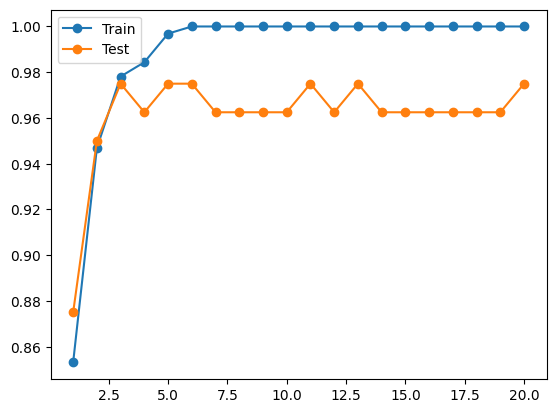

In [43]:


# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

***Model for Random forest classifier***

In [44]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 3, max_features = 'log2', min_samples_leaf = 3, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_resampled, y_resampled.values)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test_norm))
#print(rd_clf.predict(X_test_norm))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_resampled, rd_clf.predict(X_resampled))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test_norm))}")

Training Accuracy of Random Forest Classifier is 0.98989898989899
Test Accuracy of Random Forest Classifier is 0.9875 

Confusion Matrix :- 
[[28  0]
 [ 1 51]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



***Checking for overfitting of rfc***

***Gradient Boosting Classifier***

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_resampled, y_resampled.values)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test_norm))
#print(gb.predict(X_test_norm))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_resampled, gb.predict(X_resampled))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test_norm))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.975 

Confusion Matrix :- 
[[28  0]
 [ 2 50]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [46]:
#import pickle
gbclassifier = 'gb_model.pkl'
with open(gbclassifier, 'wb') as file:
    pickle.dump(gb, file)

***AdaBoost Classifier***

In [47]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_resampled, y_resampled.values)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test_norm))
#print(ada.predict(X_test_norm))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_resampled, ada.predict(X_resampled))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test_norm))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.975 

Confusion Matrix :- 
[[28  0]
 [ 2 50]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [48]:
adaclassifier = 'ada_model.pkl'
with open(adaclassifier, 'wb') as file:
    pickle.dump(gb, file)

***Stochastic Gradient Boosting (SGB)***

In [49]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_resampled, y_resampled.values)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test_norm))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_resampled, sgb.predict(X_resampled))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test_norm))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.975 

Confusion Matrix :- 
[[28  0]
 [ 2 50]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



***XgBoost***

In [50]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_resampled, y_resampled.values)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test_norm))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_resampled, xgb.predict(X_resampled))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test_norm))}")


Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9875 

Confusion Matrix :- 
[[28  0]
 [ 1 51]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [58]:
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[
        ('rd_clf', rd_clf), ('knn', knn), ('dtc', dtc)], 
        voting='hard',
        weights=[1,1,1],
)

eclf1 = eclf1.fit(X_resampled, y_resampled.values)

# accuracy score, confusion matrix and classification report of xgboost

eclf1_acc = accuracy_score(y_test, eclf1.predict(X_test_norm))

print(f"Training Accuracy of Voting Classifier is {accuracy_score(y_resampled, eclf1.predict(X_resampled))}")
print(f"Test Accuracy of Voting Classifier is {eclf1_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, eclf1.predict(X_test_norm))}\n")
print(f"Classification Report :- \n {classification_report(y_test, eclf1.predict(X_test_norm))}")

Training Accuracy of Voting Classifier is 0.9873737373737373
Test Accuracy of Voting Classifier is 1.0 

Confusion Matrix :- 
[[28  0]
 [ 0 52]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [59]:
votingClassifier = 'voting_model.pkl'
with open(votingClassifier, 'wb') as file:
    pickle.dump(eclf1, file)